# **K Means Clustering**

K-Means is one of the simplest and most widely used clustering algorithms in unsupervised learning. It is used to partition a dataset into K distinct clusters based on their features. Unlike supervised learning, where we have labeled data, clustering attempts to group data points into similar groups without prior labels.



* Cluster Assignment: Assign each data point to the closest cluster centroid.
* Centroid Update: Update the cluster centroids to be the mean of the data points assigned to them. <br>
These steps repeat until the centroids stabilize (i.e., they don’t change significantly) or a maximum number of iterations is reached.

K-Means minimizes the Within-Cluster Sum of Squares (WCSS), also known as the inertia:

**Challenges and Limitations** <br>

Choosing 
K: The number of clusters 
K must be chosen beforehand.
Methods like the elbow method or silhouette score can help determine the optimal 
K. <br>

Random Initialization:Poor initialization can lead to suboptimal solutions.
Use K-Means++ initialization to improve the chances of convergence to a better solution. <br>

Sensitive to Outliers: Outliers can skew the centroids since K-Means uses the mean to update centroids. <br>

Non-Spherical Clusters:K-Means assumes clusters are roughly spherical and of similar size. If clusters are elongated or vary significantly in size, K-Means may not perform well.

Advantage
* Simple and Fast: It’s computationally efficient and easy to understand.
* Scalable: Works well for large datasets.
* General Purpose: Can be applied to a wide range of problems.


When to stop?
* Centroids Converge: The centroids do not move significantly between iterations.
* Maximum Iterations: The algorithm reaches the predefined maximum number of iterations.
* Change in Inertia: The decrease in inertia (sum of squared distances) between iterations is below a threshold.


## Scratch Implementation

* Create class K-mean
* Create constructor with parameter K(no of clusters) and initalize clusters and lables
* Input train_data as X using fit method
* Find labels with respect to cluster for each data point
* repeat until find best cluster

In [1]:
import numpy as np

## Inbuilt method

## Example

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [3]:
X,_ = make_blobs(n_features=4,n_samples=1000)

In [4]:
X

array([[ 7.19447501, -6.13717344,  7.45538113,  9.47977348],
       [-5.91132436, -1.06124751,  7.31530384, -4.8223702 ],
       [ 4.99865675, -5.62281093,  9.88394321,  9.60940504],
       ...,
       [-7.45971366,  0.51450562,  6.86879908, -5.38056463],
       [ 5.08621931, -6.08942408,  6.78510525,  9.64253162],
       [ 6.54708516,  6.38243184,  6.15353143,  4.58584101]])

In [5]:
wcci = []
for i in range(1,10):
    kmean = KMeans(n_clusters=i,n_init='auto')
    kmean.fit(X)
    wcci.append(kmean.inertia_)

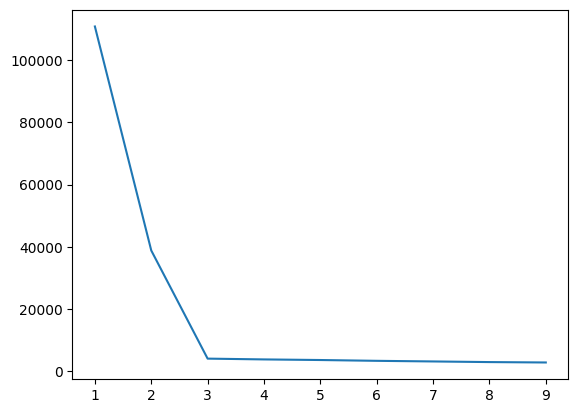

In [6]:
plt.plot(range(1,10),wcci)

From this plot we can conclude that 3 is the best no of cluster.

In [7]:
kmean = KMeans(n_clusters=3,n_init='auto')
kmean.fit(X)

KMeans(n_clusters=3, n_init='auto')

In [8]:
labels = kmean.labels_

In [9]:
centroids = kmean.cluster_centers_

In [10]:
# Silhouette Score
score = silhouette_score(X, labels)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.8292909202086906


In [11]:
X.shape

(1000, 4)

In [12]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

In [16]:
centroids_reduced = pca.fit_transform(centroids)

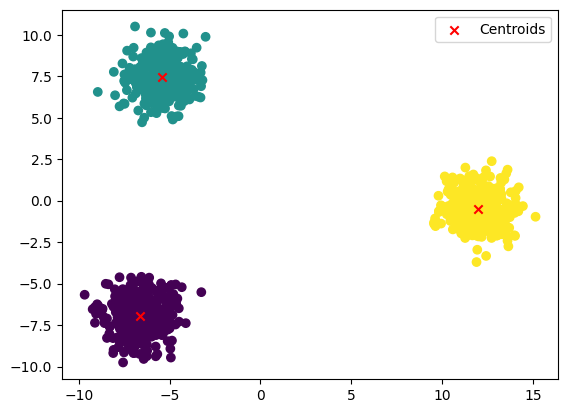

In [17]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1], color='red', marker='x', label='Centroids')
plt.legend()
plt.show()

**Tips for Effectively Using K-Means**


1. Tip 1: Choosing the Number of Clusters
* The choice of 
𝐾
K is crucial. Here are two common techniques:

* Elbow Method: Plot the inertia (WCSS) as a function of 
𝐾
K. Look for the "elbow" point where inertia stops decreasing significantly. <br>
Silhouette Score: Measures how similar a data point is to its own cluster compared to others. Higher scores indicate better-defined clusters.